# Handwritten Digit Recognition

Objective: Classify handwritten digits from the MNIST dataset by training a convolutional neural network (CNN) using the [Keras](https://keras.io) deep learning library.

## Data Preparation

We begin by downloading the data and creating training & validation sets. Keras has inbuilt helper functions to do this.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 12s 1us/step


Each sample is a 28px x 28 px image, flattened out a vector of length 784 i.e. 28x28.

In [2]:
train_images[0].shape, train_labels[0]

((28, 28), 5)

Let's take a look at some sample images from the training set, by plotting them in a grid.

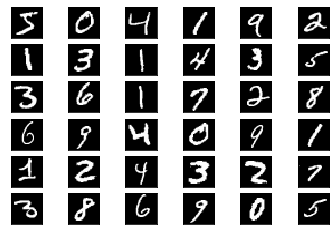

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

grid_size = 6
f, axarr = plt.subplots(grid_size, grid_size)
for i in range(grid_size):
    for j in range(grid_size):
        ax = axarr[i, j]
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.imshow(train_images[i * grid_size + j], cmap='gray')

We're going to apply the following preprocessing steps:
1. Reshape the image vectors into 28x28 matrices
2. Separate 20% of the training set to create a vaidation set
3. Conver the numeric labels into one-hot vectors

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

partial_train_images = train_images[:45000]
partial_train_labels = train_labels[:45000]

validation_images = train_images[45000:]
validation_labels = train_labels[45000:]

partial_train_labels = to_categorical(partial_train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

## Model & Training

Now we're ready to define a simple CNN model.

In [5]:
input_shape = (28,28,1)
num_classes = 10

In [27]:
import jovian

hyperparams = {
    'num_classes': 10
}

jovian.log_hyperparams(hyperparams)

[jovian] Hypermaters logged.


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    partial_train_images, 
    partial_train_labels, 
    epochs=3, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 13s 297us/step - loss: 0.3726 - acc: 0.9002 - val_loss: 0.1960 - val_acc: 0.9459
Epoch 2/3
45000/45000 [==============================] - 13s 279us/step - loss: 0.1476 - acc: 0.9580 - val_loss: 0.1363 - val_acc: 0.9615
Epoch 3/3
45000/45000 [==============================] - 13s 283us/step - loss: 0.0977 - acc: 0.9723 - val_loss: 0.0932 - val_acc: 0.9736


In [28]:
jovian.log_metrics({
    'loss': 0.0977,
    'acc': 0.9723,
    'val_loss': 0.0932,
    'val_acc': 0.9736
})

[jovian] Metrics logged.


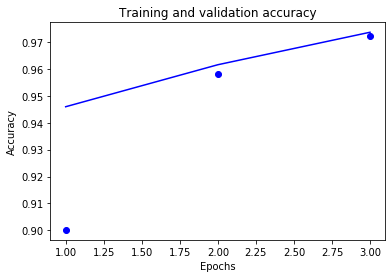

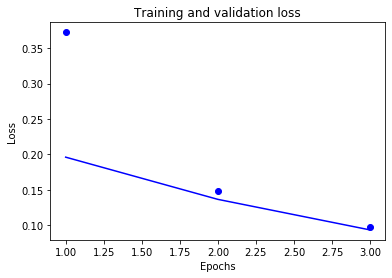

In [24]:
from utils import plot_history

plot_history(history)

## Model Evaluation

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 81us/step


In [11]:
print('Test loss:', test_loss)
print('Test acc:', test_acc)

Test loss: 0.08264216798692942
Test acc: 0.9748


We can also save the trained model's weights to disk, so we won't need to train it again.

In [3]:
#model.save('mnist-cnn.h5')
#comment

## Save & Commit

In [4]:
!pip install jovian --upgrade

  Found existing installation: jovian 0.1.60
    Uninstalling jovian-0.1.60:
      Successfully uninstalled jovian-0.1.60


In [5]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(files=['utils.py'], artifacts=['mnist-cnn.h5'])

[jovian] Saving notebook..


<IPython.core.display.Javascript object>